**Plagiarism Check Using 4 Different Methods**

Link presentasi: https://docs.google.com/presentation/d/1l6MTlqiD9N9g-US2nvAOBeGcrR7KSvbO/edit?usp=sharing&ouid=117482602845235651985&rtpof=true&sd=true

In [ ]:
import pandas as pd
import numpy as np
import os
import re
from nltk import word_tokenize
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
nltk.download(['punkt', 'wordnet', 'stopwords'])
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def jaccard(original, sus):  
  #word tokenisation
  tokens_o=word_tokenize(original)
  tokens_p=word_tokenize(sus)

  #lowerCase
  tokens_o = [token.lower() for token in tokens_o]
  tokens_p = [token.lower() for token in tokens_p]

  #stop word removal
  #punctuation removal
  stop_words=set(stopwords.words('indonesian'))
  punctuations=['"','.','(',')',',','?',';',':',"''",'``']
  filtered_tokens_o = [w for w in tokens_o if not w in stop_words and not w in punctuations]
  filtered_tokens_p = [w for w in tokens_p if not w in stop_words and not w in punctuations]

  #Trigram Similiarity measures
  trigrams_o=[]
  for i in range(len(tokens_o)-2):
      t=(tokens_o[i],tokens_o[i+1],tokens_o[i+2])
      trigrams_o.append(t)

  s=0
  trigrams_p=[]
  for i in range(len(tokens_p)-2):
      t=(tokens_p[i],tokens_p[i+1],tokens_p[i+2])
      trigrams_p.append(t)
      if t in trigrams_o:
          s+=1

  #jaccord coefficient = (S(o)^S(p))/(S(o) U S(p))
  J=s/(len(trigrams_o)+len(trigrams_p)) 

  #containment measure
  C=s/len(trigrams_p)

  return J

In [ ]:
def containment(original, sus):  
  #word tokenisation
  tokens_o=word_tokenize(original)
  tokens_p=word_tokenize(sus)

  #lowerCase
  tokens_o = [token.lower() for token in tokens_o]
  tokens_p = [token.lower() for token in tokens_p]

  #stop word removal
  #punctuation removal
  stop_words=set(stopwords.words('indonesian'))
  punctuations=['"','.','(',')',',','?',';',':',"''",'``']
  filtered_tokens_o = [w for w in tokens_o if not w in stop_words and not w in punctuations]
  filtered_tokens_p = [w for w in tokens_p if not w in stop_words and not w in punctuations]

  #Trigram Similiarity measures
  trigrams_o=[]
  for i in range(len(tokens_o)-2):
      t=(tokens_o[i],tokens_o[i+1],tokens_o[i+2])
      trigrams_o.append(t)

  s=0
  trigrams_p=[]
  for i in range(len(tokens_p)-2):
      t=(tokens_p[i],tokens_p[i+1],tokens_p[i+2])
      trigrams_p.append(t)
      if t in trigrams_o:
          s+=1

  #jaccord coefficient = (S(o)^S(p))/(S(o) U S(p))
  J=s/(len(trigrams_o)+len(trigrams_p)) 

  #containment measure
  C=s/len(trigrams_p)

  return C

In [ ]:
#longest common subsequence
#dynamic programming algorithm for finding lcs
def lcs(l1,l2):
    s1=word_tokenize(l1)
    s2=word_tokenize(l2)
    # storing the dp values 
    dp = [[None]*(len(s1)+1) for i in range(len(s2)+1)] 
  
    for i in range(len(s2)+1): 
        for j in range(len(s1)+1): 
            if i == 0 or j == 0: 
                dp[i][j] = 0
            elif s2[i-1] == s1[j-1]: 
                dp[i][j] = dp[i-1][j-1]+1
            else: 
                dp[i][j] = max(dp[i-1][j] , dp[i][j-1]) 
    return dp[len(s2)][len(s1)] 

In [ ]:
def method3(original, sus):
    #word tokenisation
  tokens_o=word_tokenize(original)
  tokens_p=word_tokenize(sus)

  #lowerCase
  tokens_o = [token.lower() for token in tokens_o]
  tokens_p = [token.lower() for token in tokens_p]

  #stop word removal
  #punctuation removal
  stop_words=set(stopwords.words('indonesian'))
  punctuations=['"','.','(',')',',','?',';',':',"''",'``']
  filtered_tokens_o = [w for w in tokens_o if not w in stop_words and not w in punctuations]
  filtered_tokens_p = [w for w in tokens_p if not w in stop_words and not w in punctuations]  
  sent_o=sent_tokenize(original)
  sent_p=sent_tokenize(sus)

  #maximum length of LCS for a sentence in suspicious text
  max_lcs=0
  sum_lcs=0

  for i in sent_p:
      for j in sent_o:
          l=lcs(i,j)
          max_lcs=max(max_lcs,l)
      sum_lcs+=max_lcs
      max_lcs=0

  score=sum_lcs/len(tokens_p)
  return score

In [ ]:
student_files = [doc for doc in os.listdir() if doc.endswith('.txt')]
student_notes = [open(_file, encoding = "ISO-8859-1").read()
                 for _file in student_files]
student_notes

In [ ]:
def vectorize(Text): 
  return TfidfVectorizer().fit_transform(Text).toarray()

def similarity(doc1, doc2): 
  return cosine_similarity([doc1, doc2])

In [ ]:
vectors = vectorize(student_notes2)
s_vectors = list(zip(student_files2, vectors))
plagiarism_results = set()

In [ ]:
def check_plagiarism():
    global s_vectors
    for student_a, text_vector_a in s_vectors:
        new_vectors = s_vectors.copy()
        current_index = new_vectors.index((student_a, text_vector_a))
        del new_vectors[current_index]
        for student_b, text_vector_b in new_vectors:
            sim_score = similarity(text_vector_a, text_vector_b)[0][1]
            student_pair = sorted((student_a, student_b))
            score = (student_pair[0], student_pair[1], sim_score)
            plagiarism_results.add(score)
    return plagiarism_results

In [ ]:
cosine_list = []
for data in check_plagiarism():
    cosine_list += [data]

In [ ]:
!wget https://s3.amazonaws.com/video.udacity-data.com/topher/2019/January/5c4147f9_data/data.zip
!unzip data 

In [ ]:
csv_file = 'data/file_information.csv'
plagiarism_df = pd.read_csv(csv_file)

# print out the first few rows of data info
plagiarism_df.head()

,File,Task,Category
0,g0pA_taska.txt,a,non
1,g0pA_taskb.txt,b,cut
2,g0pA_taskc.txt,c,light
3,g0pA_taskd.txt,d,heavy
4,g0pA_taske.txt,e,non


In [ ]:
test_df = plagiarism_df.copy()
# test_df.drop(columns='Category')

In [ ]:
def create_text_column(df, file_directory='data/'):
    # create copy to modify
    text_df = df.copy()
    
    # store processed text
    text = []
    
    # for each file (row) in the df, read in the file 
    for row_i in df.index:
        filename = df.iloc[row_i]['File']
        #print(filename)
        file_path = file_directory + filename
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:

            # standardize text using helper function
            file_text = process_file(file)
            # append processed text to list
            text.append(file_text)
    
    # add column to the copied dataframe
    text_df['Text'] = text
    
    return text_df
# helper function for pre-processing text given a file
def process_file(file):
    # put text in all lower case letters 
    all_text = file.read().lower()

    # remove all non-alphanumeric chars
    all_text = re.sub(r"[^a-zA-Z0-9]", " ", all_text)
    # remove newlines/tabs, etc. so it's easier to match phrases, later
    all_text = re.sub(r"\t", " ", all_text)
    all_text = re.sub(r"\n", " ", all_text)
    all_text = re.sub("  ", " ", all_text)
    all_text = re.sub("   ", " ", all_text)
    
    return all_text

In [ ]:
text_df = create_text_column(test_df)
text_df.head()

,File,Task,Category,Text
0,g0pA_taska.txt,a,non,inheritance is a basic concept of object orien...
1,g0pA_taskb.txt,b,cut,pagerank is a link analysis algorithm used by ...
2,g0pA_taskc.txt,c,light,the vector space model also called term vector...
3,g0pA_taskd.txt,d,heavy,bayes theorem was names after rev thomas bayes...
4,g0pA_taske.txt,e,non,dynamic programming is an algorithm design tec...


In [ ]:
masks = [text_df.File.str.contains('orig'),
         text_df.File.str.contains('task')]

values = [
    'Original',
    'Task'
]

text_df['Type'] = np.select(masks, values, default='Unknown')

In [ ]:
text_task = text_df[text_df['Type']=='Task']
text_orig = text_df[text_df['Type']=='Original']

In [ ]:
student_files = text_df['File'].to_list()
student_notes = text_df['Text'].to_list()

In [ ]:
list_task = ['a','b','c','d','e']

In [ ]:
text_task['Jaccard'] = ''
text_task['Containment'] = ''
text_task['LCS'] = ''

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

Jaccard

In [ ]:
for tipe in list_task:
  for i in text_task[text_task['Task']==tipe].index:
    text_task['Jaccard'][i] = jaccard(text_task['Text'][i], text_orig.loc[text_orig['Task']==tipe,"Text"].values[0])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


Containment Measure

In [ ]:
for tipe in list_task:
  for i in text_task[text_task['Task']==tipe].index:
    text_task['Containment'][i] = containment(text_task['Text'][i], text_orig.loc[text_orig['Task']==tipe,"Text"].values[0])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


Longest Common Subsequent

In [ ]:
for tipe in list_task:  
  for i in text_task[text_task['Task']==tipe].index:
    text_task['LCS'][i] = method3(text_task['Text'][i], text_orig.loc[text_orig['Task']==tipe,"Text"].values[0])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
final_test[final_test['Category']=='non'][['Category','Score','catcosine']]

,Category,Score,catcosine
0,non,0.256141,non
4,non,0.358783,non
5,non,0.152534,non
6,non,0.526115,heavy
11,non,0.404121,non
12,non,0.410025,non
18,non,0.130347,non
19,non,0.209696,non
22,non,0.432511,non
23,non,0.195039,non


In [ ]:
text_task

,File,Task,Category,Text,Type,Jaccard,Containment,LCS
0,g0pA_taska.txt,a,non,inheritance is a basic concept of object orien...,Task,0.00573614,0.00980392,0.136364
1,g0pA_taskb.txt,b,cut,pagerank is a link analysis algorithm used by ...,Task,0.279946,0.390244,0.325234
2,g0pA_taskc.txt,c,light,the vector space model also called term vector...,Task,0.302575,0.5875,0.797521
3,g0pA_taskd.txt,d,heavy,bayes theorem was names after rev thomas bayes...,Task,0.0686869,0.111842,0.199346
4,g0pA_taske.txt,e,non,dynamic programming is an algorithm design tec...,Task,0.00980392,0.0136187,0.0949612
...,...,...,...,...,...,...,...,...
90,g4pE_taska.txt,a,heavy,object oriented programming is a style of prog...,Task,0.0117647,0.0196078,0.162338
91,g4pE_taskb.txt,b,light,pagerankalgorithm is also known as link analys...,Task,0.258398,0.375235,0.381308
92,g4pE_taskc.txt,c,cut,the definition of term depends on the applicat...,Task,0.144444,0.270833,0.247934
93,g4pE_taskd.txt,d,non,bayes theorem or bayes rule or something cal...,Task,0,0,0.107843


In [ ]:
cosine_list

In [ ]:
cosine = pd.DataFrame(cosine_list)

In [ ]:
cosine

,0,1,2
0,g0pA_taske.txt,g3pA_taskb.txt,0.121288
1,g2pC_taske.txt,g3pC_taske.txt,0.403278
2,g0pA_taska.txt,g4pB_taskd.txt,0.112165
3,g1pA_taskd.txt,g1pD_taskc.txt,0.189596
4,g3pC_taskc.txt,g4pD_taska.txt,0.155305
...,...,...,...
4945,g1pD_taske.txt,g3pA_taskc.txt,0.208065
4946,g1pA_taske.txt,g4pE_taskd.txt,0.146232
4947,g2pC_taske.txt,orig_taska.txt,0.186809
4948,g0pD_taskc.txt,g3pB_taske.txt,0.213105


In [ ]:
cosine = cosine.rename(columns={0: 'File', 1: 'Original', 2: 'Score'})

In [ ]:
cosine = cosine[cosine['Original'].str.contains('orig')]

In [ ]:
finala = cosine[cosine['File'].str.contains('taska') & cosine['Original'].str.contains('taska')].sort_values(by=['File'])
finalb = cosine[cosine['File'].str.contains('taskb') & cosine['Original'].str.contains('taskb')].sort_values(by=['File'])
finalc = cosine[cosine['File'].str.contains('taskc') & cosine['Original'].str.contains('taskc')].sort_values(by=['File'])
finald = cosine[cosine['File'].str.contains('taskd') & cosine['Original'].str.contains('taskd')].sort_values(by=['File'])
finale = cosine[cosine['File'].str.contains('taske') & cosine['Original'].str.contains('taske')].sort_values(by=['File'])

final_banget = finala.append(finalb.append(finalc.append(finald.append(finale))))
final_banget.reset_index(inplace=True)

In [ ]:
final = final_banget.drop(columns=['index','Original'])

In [ ]:
final

,File,Score
0,g0pA_taska.txt,0.256211
1,g0pB_taska.txt,0.150787
2,g0pC_taska.txt,0.530590
3,g0pD_taska.txt,0.834475
4,g0pE_taska.txt,0.968667
...,...,...
90,g3pC_taske.txt,0.476018
91,g4pB_taske.txt,0.893088
92,g4pC_taske.txt,0.742989
93,g4pD_taske.txt,0.710432


In [ ]:
final_test = text_task.copy()

In [ ]:
final_test = final_test.merge(final, on='File', how = 'left')

In [ ]:
final_test.head(10)

,File,Task,Category,Text,Type,Jaccard,Containment,LCS,Score
0,g0pA_taska.txt,a,non,inheritance is a basic concept of object orien...,Task,0.00573614,0.00980392,0.136364,0.256141
1,g0pA_taskb.txt,b,cut,pagerank is a link analysis algorithm used by ...,Task,0.279946,0.390244,0.325234,0.787296
2,g0pA_taskc.txt,c,light,the vector space model also called term vector...,Task,0.302575,0.5875,0.797521,0.899383
3,g0pA_taskd.txt,d,heavy,bayes theorem was names after rev thomas bayes...,Task,0.0686869,0.111842,0.199346,0.522801
4,g0pA_taske.txt,e,non,dynamic programming is an algorithm design tec...,Task,0.00980392,0.0136187,0.0949612,0.358783
5,g0pB_taska.txt,a,non,inheritance is a basic concept in object orien...,Task,0.00693241,0.0130719,0.142857,0.152534
6,g0pB_taskb.txt,b,non,pagerank pr refers to both the concept and the...,Task,0.0206986,0.0300188,0.136449,0.526115
7,g0pB_taskc.txt,c,cut,vector space model is an algebraic model for r...,Task,0.367159,0.829167,0.780992,0.937966
8,g0pB_taskd.txt,d,light,bayes theorem relates the conditional and marg...,Task,0.209524,0.361842,0.352941,0.754743
9,g0pB_taske.txt,e,heavy,dynamic programming is a method for solving ma...,Task,0.109626,0.159533,0.273256,0.703059


In [ ]:
jaccard_df = final_test[['File','Task','Jaccard']]
contmeasure_df = final_test[['File','Task','Containment']]
lcs_df = final_test[['File','Task','LCS']]
cosinesim_df = final_test[['File','Task','Score']]

In [ ]:
jaccard_df['catjaccard'] = ''

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
for i in range(95):
  if jaccard_df['Jaccard'][i] < 0.04:
    jaccard_df['catjaccard'][i] = 'non'
  elif jaccard_df['Jaccard'][i] < 0.2 and jaccard_df['Jaccard'][i] >= 0.04:
    jaccard_df['catjaccard'][i] = 'heavy'
  elif jaccard_df['Jaccard'][i] < 0.27 and jaccard_df['Jaccard'][i] >=0.2:
    jaccard_df['catjaccard'][i] = 'light'
  else:
    jaccard_df['catjaccard'][i] = 'cut'

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
jaccard_df['catjaccard'] = jaccard_df['catjaccard'].replace(['cut'],'light')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
contmeasure_df['catcontainment'] = ''
lcs_df['catlcs'] = ''
cosinesim_df['catcosine'] = ''

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
for i in range(95):
  if contmeasure_df['Containment'][i] < 0.03:
    contmeasure_df['catcontainment'][i] = 'non'
  elif  contmeasure_df['Containment'][i] < 0.3 and  contmeasure_df['Containment'][i] >= 0.03:
    contmeasure_df['catcontainment'][i] = 'heavy'
  elif  contmeasure_df['Containment'][i] < 0.7 and  contmeasure_df['Containment'][i] >=0.3:
    contmeasure_df['catcontainment'][i] = 'light'
  else:
    contmeasure_df['catcontainment'][i] = 'cut'

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
contmeasure_df['catcontainment'] = contmeasure_df['catcontainment'].replace(['cut'],'light')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
for i in range(95):
  if lcs_df['LCS'][i] < 0.2:
    lcs_df['catlcs'][i] = 'non'
  elif  lcs_df['LCS'][i] < 0.32 and  lcs_df['LCS'][i] >= 0.2:
    lcs_df['catlcs'][i] = 'heavy'
  elif  lcs_df['LCS'][i] < 0.7 and  lcs_df['LCS'][i] >=0.32:
    lcs_df['catlcs'][i] = 'light'
  else:
    lcs_df['catlcs'][i] = 'cut'

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
lcs_df['catlcs'] = lcs_df['catlcs'].replace(['cut'],'light')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
for i in range(95):
  if cosinesim_df['Score'][i] < 0.5:
    cosinesim_df['catcosine'][i] = 'non'
  elif  cosinesim_df['Score'][i] < 0.7 and  cosinesim_df['Score'][i] >= 0.5:
    cosinesim_df['catcosine'][i] = 'heavy'
  elif  cosinesim_df['Score'][i] >=0.7:
    cosinesim_df['catcosine'][i] = 'light'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [ ]:
jaccard_df = jaccard_df[['File','catjaccard']]
contmeasure_df = contmeasure_df[['File','catcontainment']]
lcs_df = lcs_df[['File','catlcs']]
cosinesim_df = cosinesim_df[['File','catcosine']]

In [ ]:
final_test = final_test.merge(jaccard_df, on='File', how = 'left')
final_test = final_test.merge(contmeasure_df, on='File', how = 'left')
final_test = final_test.merge(lcs_df, on='File', how = 'left')
final_test = final_test.merge(cosinesim_df, on='File', how = 'left')

In [ ]:
final_test

,File,Task,Category,Text,Type,Jaccard,Containment,LCS,Score,catjaccard,catcontainment,catlcs,catcosine
0,g0pA_taska.txt,a,non,inheritance is a basic concept of object orien...,Task,0.00573614,0.00980392,0.136364,0.256141,non,non,non,non
1,g0pA_taskb.txt,b,light,pagerank is a link analysis algorithm used by ...,Task,0.279946,0.390244,0.325234,0.787296,light,light,light,light
2,g0pA_taskc.txt,c,light,the vector space model also called term vector...,Task,0.302575,0.5875,0.797521,0.899383,light,light,light,light
3,g0pA_taskd.txt,d,heavy,bayes theorem was names after rev thomas bayes...,Task,0.0686869,0.111842,0.199346,0.522801,heavy,heavy,non,heavy
4,g0pA_taske.txt,e,non,dynamic programming is an algorithm design tec...,Task,0.00980392,0.0136187,0.0949612,0.358783,non,non,non,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,g4pE_taska.txt,a,heavy,object oriented programming is a style of prog...,Task,0.0117647,0.0196078,0.162338,0.325133,non,non,non,non
91,g4pE_taskb.txt,b,light,pagerankalgorithm is also known as link analys...,Task,0.258398,0.375235,0.381308,0.816421,light,light,light,light
92,g4pE_taskc.txt,c,light,the definition of term depends on the applicat...,Task,0.144444,0.270833,0.247934,0.614684,heavy,heavy,heavy,heavy
93,g4pE_taskd.txt,d,non,bayes theorem or bayes rule or something cal...,Task,0,0,0.107843,0.280435,non,non,non,non


In [ ]:
acc_jaccard = accuracy_score(final_test['Category'], final_test['catjaccard'])*100
acc_contmeasure = accuracy_score(final_test['Category'], final_test['catcontainment'])*100
acc_lcs = accuracy_score(final_test['Category'], final_test['catlcs'])*100
acc_cosine = accuracy_score(final_test['Category'], final_test['catcosine'])*100

In [ ]:
print('Jaccard Score: ', acc_jaccard)
print('Containment Score: ', acc_contmeasure)
print('LCS Score: ', acc_lcs)
print('Cosine Score: ', acc_cosine)

Jaccard Score:  73.68421052631578
Containment Score:  69.47368421052632
LCS Score:  74.73684210526315
Cosine Score:  62.10526315789474


In [ ]:
final_test['Category'] = final_test['Category'].replace(['cut'],'light')

In [ ]:
text_task

,File,Task,Category,Text,Type,Jaccard,Containment,LCS
0,g0pA_taska.txt,a,non,inheritance is a basic concept of object orien...,Task,0.00573614,0.00980392,0.136364
1,g0pA_taskb.txt,b,cut,pagerank is a link analysis algorithm used by ...,Task,0.279946,0.390244,0.325234
2,g0pA_taskc.txt,c,light,the vector space model also called term vector...,Task,0.302575,0.5875,0.797521
3,g0pA_taskd.txt,d,heavy,bayes theorem was names after rev thomas bayes...,Task,0.0686869,0.111842,0.199346
4,g0pA_taske.txt,e,non,dynamic programming is an algorithm design tec...,Task,0.00980392,0.0136187,0.0949612
...,...,...,...,...,...,...,...,...
90,g4pE_taska.txt,a,heavy,object oriented programming is a style of prog...,Task,0.0117647,0.0196078,0.162338
91,g4pE_taskb.txt,b,light,pagerankalgorithm is also known as link analys...,Task,0.258398,0.375235,0.381308
92,g4pE_taskc.txt,c,cut,the definition of term depends on the applicat...,Task,0.144444,0.270833,0.247934
93,g4pE_taskd.txt,d,non,bayes theorem or bayes rule or something cal...,Task,0,0,0.107843


In [ ]:
cosine2 = text_task[['File','Task','Category']]

In [ ]:
cosine2 = cosine2.merge(final, on='File', how = 'left')

In [ ]:
for i in range(95):
  if cosine2['Score'][i] < 0.5:
    cosine2['catcosine'][i] = 'non'
  elif  cosine2['Score'][i] < 0.7 and  cosine2['Score'][i] >= 0.5:
    cosine2['catcosine'][i] = 'heavy'
  elif  cosine2['Score'][i] < 0.8 and cosine2['Score'][i] >=0.7:
    cosine2['catcosine'][i] = 'light'
  else:
    cosine2['catcosine'][i] = 'cut'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__

In [ ]:
cosine2['catcosine'] = ''

In [ ]:
acc_cosine2 = accuracy_score(cosine2['Category'], cosine2['catcosine'])*100
acc_cosine2

52.63157894736842

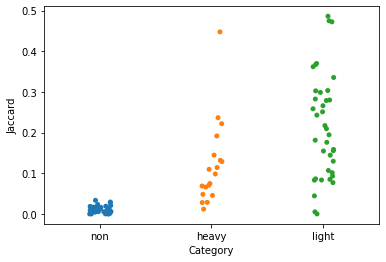

In [ ]:
sns.stripplot(x='Category', y='Jaccard',data=final_test,order=['non','heavy','light'])

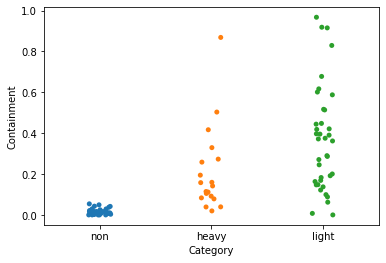

In [ ]:
sns.stripplot(x='Category', y='Containment',data=final_test,order=['non','heavy','light'])

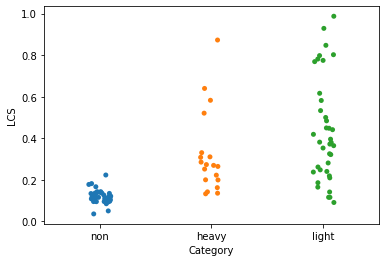

In [ ]:
sns.stripplot(x='Category', y='LCS',data=final_test,order=['non','heavy','light'])

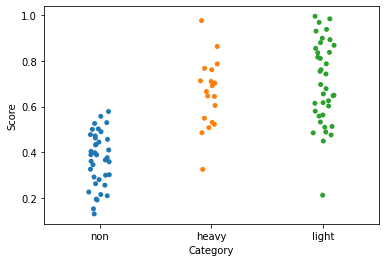

In [ ]:
sns.stripplot(x='Category', y='Score',data=final_test,order=['non','heavy','light'])

In [ ]:
original = 'Komodo merupakan spesies terbesar dari familia Varanidae, sekaligus kadal terbesar di dunia, dengan rata-rata panjang 2-3 meter dan beratnya bisa mencapai 100 kg. Komodo merupakan pemangsa puncak di habitatnya karena sejauh ini tidak diketahui adanya hewan karnivora besar lain selain biawak ini di sebarang geografisnya. Tubuhnya yang besar dan reputasinya yang mengerikan membuat mereka menjadi salah satu hewan paling terkenal di dunia.Sekarang, habitat komodo yang sesungguhnya telah menyusut akibat aktivitas manusia, sehingga lembaga IUCN memasukkan komodo sebagai spesies yang rentan terhadap kepunahan.Biawak komodo telah ditetapkan sebagai hewan yang dilindungi oleh pemerintah Indonesia dan habitanya dijadikan taman nasional, yaitu Taman Nasional Komodo, yang tujuannya didirikan untuk melindungi mereka.'
sus = 'Komodo liar dewasa biasanya memiliki berat sekitar 70 kg, tetapi komodo yang dipelihara di penangkaran sering kali memiliki bobot yang lebih berat. Komodo memiliki ekor yang sama panjang dengan tubuhnya. Komodo jantan lebih besar daripada komodo betina, dengan warna kulit dari abu-abu gelap sampai merah batu bata, sementara komodo betina biasanya berwarna hijau kecokelatan dan memiliki bercak kecil kuning pada tenggorokannya. Komodo muda lebih bervariasi warnanya, dengan warna kuning, hijau dan putih dengan latar belakang hitam. Komodo memiliki lidah yang panjang, berwarna kuning kecokelatan dan bercabang.'

In [ ]:
lcs = method3(original,sus)
lcs

0.23711340206185566

In [ ]:
student_files2 = ['text1','text2']
student_notes2 = [original,sus]

In [ ]:
def cosine_sim():
    global s_vectors
    for student_a, text_vector_a in s_vectors:
        new_vectors = s_vectors.copy()
        current_index = new_vectors.index((student_a, text_vector_a))
        del new_vectors[current_index]
        for student_b, text_vector_b in new_vectors:
            sim_score = similarity(text_vector_a, text_vector_b)[0][1]
            student_pair = sorted((student_a, student_b))
            score = (student_pair[0], student_pair[1], sim_score)
            plagiarism_results.add(score)
    return plagiarism_results

In [ ]:
print(cosine_sim())

{('text1', 'text2', 0.29156124521935806)}


In [ ]:
final_test

,File,Task,Category,Text,Type,Jaccard,Containment,LCS,Score,catjaccard,catcontainment,catlcs,catcosine
0,g0pA_taska.txt,a,non,inheritance is a basic concept of object orien...,Task,0.00573614,0.00980392,0.136364,0.256141,non,non,non,non
1,g0pA_taskb.txt,b,light,pagerank is a link analysis algorithm used by ...,Task,0.279946,0.390244,0.325234,0.787296,light,light,light,light
2,g0pA_taskc.txt,c,light,the vector space model also called term vector...,Task,0.302575,0.5875,0.797521,0.899383,light,light,light,light
3,g0pA_taskd.txt,d,heavy,bayes theorem was names after rev thomas bayes...,Task,0.0686869,0.111842,0.199346,0.522801,heavy,heavy,non,heavy
4,g0pA_taske.txt,e,non,dynamic programming is an algorithm design tec...,Task,0.00980392,0.0136187,0.0949612,0.358783,non,non,non,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,g4pE_taska.txt,a,heavy,object oriented programming is a style of prog...,Task,0.0117647,0.0196078,0.162338,0.325133,non,non,non,non
91,g4pE_taskb.txt,b,light,pagerankalgorithm is also known as link analys...,Task,0.258398,0.375235,0.381308,0.816421,light,light,light,light
92,g4pE_taskc.txt,c,light,the definition of term depends on the applicat...,Task,0.144444,0.270833,0.247934,0.614684,heavy,heavy,heavy,heavy
93,g4pE_taskd.txt,d,non,bayes theorem or bayes rule or something cal...,Task,0,0,0.107843,0.280435,non,non,non,non
